In [86]:
import pandas as pd
import numpy as np
from scipy.io import arff

data, meta = arff.loadarff('bone-marrow.arff')

df = pd.DataFrame(data)
df.replace(b"?", np.nan, inplace=True)

#source: https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children

In [87]:
dataset = df['survival_time']
y = np.zeros(187)
for i,val in enumerate(dataset):
    if val < 366:
        y[i] = 1
df['1_year_survival_status'] = list(y)

In [88]:
int_col = ['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'survival_status', '1_year_survival_status']
float_col = ['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', ]
string_col = ['Disease']

for col, t in df.dtypes.items():
    if col in int_col:
        df[col] = df[col].apply(lambda x: int(x) if not pd.isnull(x) else x)
    elif col in float_col:
        df[col] = df[col].apply(lambda x: float(x) if not pd.isnull(x) else x)
    elif col in string_col:
        df[col] = df[col].apply(lambda x: str(x) if not pd.isnull(x) else x)


In [89]:
print('# of rows:', df.shape[0])
print('# of columns:', df.shape[1])

# of rows: 187
# of columns: 38


In [90]:
df

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Disease,Riskgroup,Txpostrelapse,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,HLAgrI,Recipientage,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status,1_year_survival_status
0,1,1,22,0,1,0,1,1.0,1.0,0.0,3.0,1.0,1.0,b'ALL',1,0,1,0,0,-1.0,-1.0,0,9.6,0,1,0,0,1.0,7.20,1.338760,5.38,35.0,19,51,32,999,0,0
1,1,0,23,0,1,0,-1,-1.0,1.0,0.0,0.0,0.0,0.0,b'ALL',0,0,1,0,0,-1.0,-1.0,0,4.0,0,0,1,1,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163,1,1
2,1,0,26,0,1,0,-1,-1.0,1.0,0.0,2.0,0.0,1.0,b'ALL',0,0,1,0,0,-1.0,-1.0,0,6.6,0,1,1,1,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435,1,0
3,0,0,39,1,1,0,1,2.0,1.0,1.0,1.0,1.0,0.0,b'AML',0,0,1,0,0,-1.0,-1.0,0,18.1,1,2,0,0,NaN,4.25,29.481647,0.14,50.0,23,29,19,53,1,1
4,0,1,33,0,0,0,1,2.0,0.0,1.0,0.0,0.0,1.0,b'chronic',1,0,1,1,0,1.0,0.0,1,1.3,0,0,0,1,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37,1,1,0,1,1.0,0.0,0.0,3.0,1.0,1.0,b'lymphoma',1,1,1,0,0,-1.0,-1.0,0,12.9,1,2,1,0,1.0,11.08,2.522750,4.39,44.0,15,22,16,385,1,0
183,0,1,22,0,0,0,1,0.0,1.0,1.0,2.0,0.0,1.0,b'AML',1,0,1,0,0,-1.0,-1.0,0,13.9,1,2,0,1,1.0,4.64,1.038858,4.47,44.5,12,30,1000000,634,1,0
184,0,1,27,0,1,0,1,-1.0,1.0,1.0,3.0,1.0,1.0,b'nonmalignant',0,0,0,0,0,-1.0,-1.0,0,10.4,1,2,0,1,1.0,7.73,1.635559,4.73,33.0,16,16,1000000,1895,0,0
185,1,1,27,0,1,0,1,0.0,1.0,1.0,0.0,0.0,0.0,b'chronic',0,0,1,1,0,1.0,0.0,1,8.0,0,1,0,0,0.0,15.41,8.077770,1.91,24.0,13,14,54,382,1,0


In [91]:
X = df.drop(labels=['survival_status', 'survival_time'], axis=1)
y = df['1_year_survival_status']

In [92]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [93]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (187, 38)
fraction of missing values in features:
RecipientABO    0.005348
RecipientRh     0.010695
ABOmatch        0.005348
CMVstatus       0.085561
DonorCMV        0.010695
RecipientCMV    0.074866
Antigen         0.005348
Alel            0.005348
extcGvHD        0.165775
CD3dCD34        0.026738
CD3dkgx10d8     0.026738
Rbodymass       0.010695
dtype: float64
data types of the features with missing values:
RecipientABO    float64
RecipientRh     float64
ABOmatch        float64
CMVstatus       float64
DonorCMV        float64
RecipientCMV    float64
Antigen         float64
Alel            float64
extcGvHD        float64
CD3dCD34        float64
CD3dkgx10d8     float64
Rbodymass       float64
dtype: object
fraction of points with missing values: 0.24064171122994651


print(df.shape)
df = df.dropna(axis=0)
print(df_r.shape)

In [94]:
print('# of rows:', df.shape[0])
print('# of columns:', df.shape[1])

# of rows: 187
# of columns: 38


In [95]:
print(y.value_counts())

1_year_survival_status
0    121
1     66
Name: count, dtype: int64


In [96]:
pd.set_option('display.max_rows', 100)
dataset = df[y == 0]['survival_time'].value_counts()
#dataset.sort_index()

In [97]:
df.columns

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'survival_status',
       '1_year_survival_status'],
      dtype='object')

1_year_survival_status    0   1
extcGvHD                       
0.0                      17  11
1.0                     104  24
1_year_survival_status         0         1
extcGvHD                                  
0.0                     0.607143  0.392857
1.0                     0.812500  0.187500


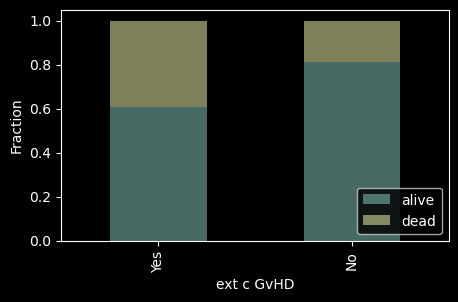

In [98]:
import numpy as np
from matplotlib import pylab as plt

y1 = ['CMVstatus', 'HLAmatch', 'Antigen', 'Alel', 'HLAgrI', 'Recipientageint', 
      'Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmismatch', 'Recipientage10',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD']

count_matrix = df.groupby(['extcGvHD','1_year_survival_status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3), alpha = 0.5)
plt.ylabel('Fraction')
plt.xlabel('ext c GvHD')
plt.xticks([0,1], ['Yes', 'No'])
plt.legend(['alive', 'dead'], loc=4)
plt.show()



from matplotlib import pylab as plt

dataset = [df[y == 0]['PLTrecovery'].values,           
           df[y == 1 ]['PLTrecovery'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['0', '1'])
plt.ylabel('PLTrecovery')
plt.show()
make sure there are three visualization types



1_year_survival_status   0   1
RecipientCMV                  
0.0                     49  24
1.0                     66  34
1_year_survival_status         0         1
RecipientCMV                              
0.0                     0.671233  0.328767
1.0                     0.660000  0.340000


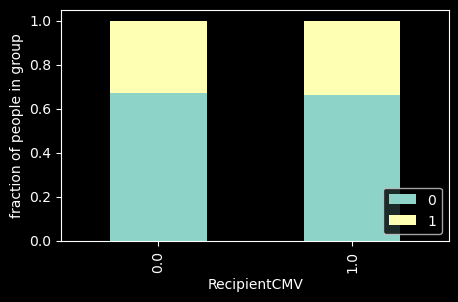

In [99]:
import numpy as np
from matplotlib import pylab as plt

count_matrix = df.groupby(['RecipientCMV','1_year_survival_status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

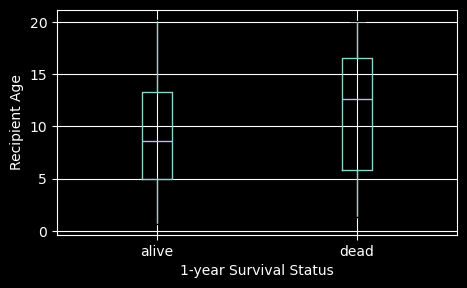

In [100]:
y2 = ['Donorage','Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 
      'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time']

df[['Recipientage','1_year_survival_status']].boxplot(by='1_year_survival_status', figsize=(5,3))
plt.ylabel('Recipient Age')
plt.xlabel('1-year Survival Status')
plt.xticks([1,2],['alive', 'dead'])
plt.title("")
plt.suptitle('')
plt.show()

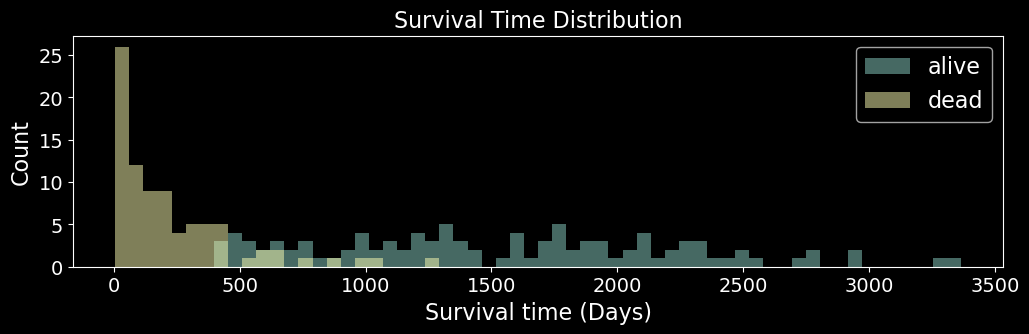

In [101]:
bin_range = (df['survival_time'].min(),df['survival_time'].max())

plt.figure(figsize=(12,3))

for c in [0,1]:
    plt.hist(df[df['survival_status']==c]['survival_time'],alpha=0.5,label=c,range=bin_range,bins=60)
plt.legend(['alive', 'dead'], fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Survival time (Days)', fontsize=16)
plt.title('Survival Time Distribution',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.style.use('dark_background')
plt.show()

In [102]:
y.value_counts()

1_year_survival_status
0    121
1     66
Name: count, dtype: int64

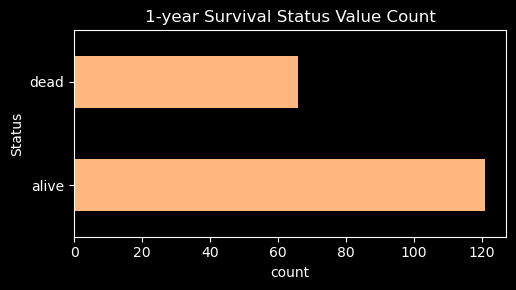

In [103]:
plt.figure(figsize=(5,3))

y.value_counts().reindex([0,1]).plot.barh(color="#ffb780")
plt.xlabel('count')
plt.ylabel('Status')
plt.title('1-year Survival Status Value Count')
plt.tight_layout()
plt.yticks([0,1], ['alive', 'dead'])
plt.show()

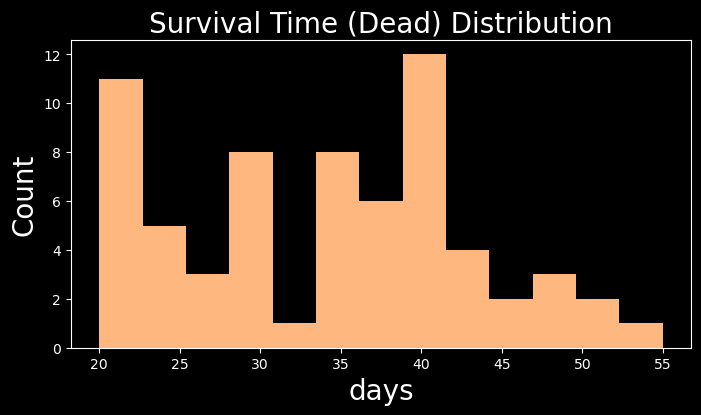

In [104]:
plt.figure(figsize=(8,4))
dataset = df[y == 1]['Donorage'].values

plt.hist(dataset, bins = int(np.sqrt(df.shape[0])), color="#ffb780")
plt.xlabel('days', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Survival Time (Dead) Distribution', fontsize=20)
plt.show()

In [105]:
df['time_to_aGvHD_III_IV'].value_counts()

time_to_aGvHD_III_IV
1000000    145
18           4
21           4
14           4
19           3
11           2
16           2
100          2
15           2
42           1
33           1
34           1
10           1
27           1
51           1
17           1
55           1
32           1
58           1
99           1
26           1
24           1
49           1
62           1
36           1
20           1
22           1
54           1
Name: count, dtype: int64

In [106]:
df['aGvHDIIIIV'].value_counts()

aGvHDIIIIV
1    147
0     40
Name: count, dtype: int64

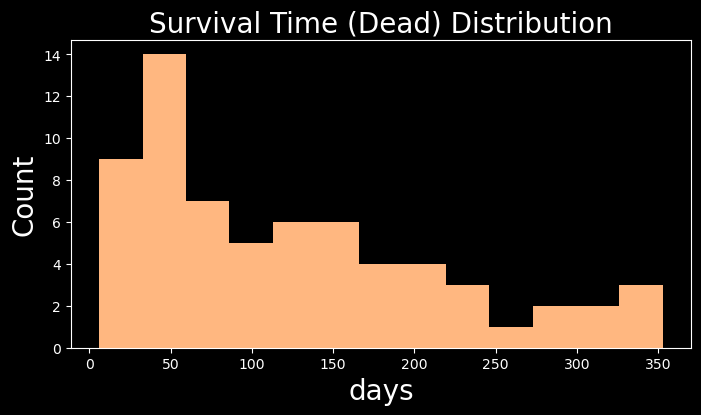

In [107]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(8,4))
dataset = df[y == 1]['survival_time'].values

plt.hist(dataset, bins = int(np.sqrt(df.shape[0])), color="#ffb780")
plt.xlabel('days', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Survival Time (Dead) Distribution', fontsize=20)
plt.show()

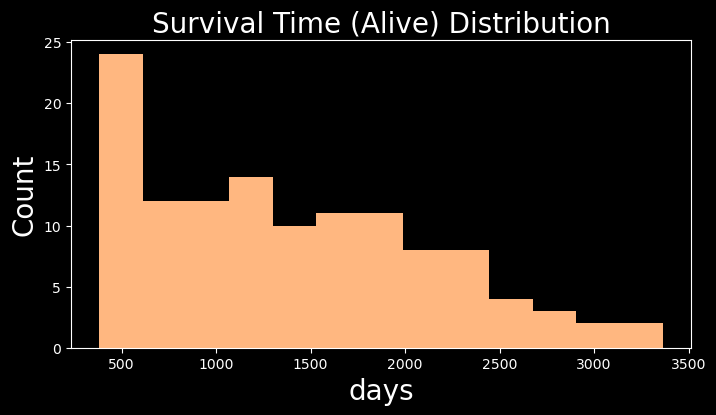

In [108]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(8,4))
dataset = df[y == 0]['survival_time'].values

plt.hist(dataset, bins = int(np.sqrt(df.shape[0])), color="#ffb780")
plt.xlabel('days', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Survival Time (Alive) Distribution', fontsize=20)
plt.show()

In [109]:
df[y == 1]['survival_time'].quantile(np.arange(0, 1, 0.1))

0.0      6.0
0.1     28.0
0.2     42.0
0.3     56.5
0.4     64.0
0.5    105.0
0.6    136.0
0.7    162.0
0.8    200.0
0.9    267.5
Name: survival_time, dtype: float64

In [110]:
df[y == 1]['survival_time']

1      163
3       53
6       41
7       45
13     335
16      58
20     115
21     330
23     149
27      35
32      96
35     321
36     111
37     149
41      28
43      60
45     150
57     137
58      11
60     261
61     181
63      19
65      55
66     224
68     306
73      66
76     102
77     113
80     200
81      26
82      60
84      60
89     202
91     136
93     161
97      67
98     191
99     130
102     56
106     68
108    274
109     28
114     57
118    236
121     48
123    117
125    290
128    108
129    196
131     10
135    182
137     15
138     48
139     41
140     42
146    214
149     59
150     64
153     90
154    246
160    353
163    174
171    147
172     31
180     41
181      6
Name: survival_time, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split 

def basic_split(X,y,train_size, val_size, test_size, random_state):
    from sklearn.model_selection import train_test_split
    import numpy as np 
    if train_size + test_size + val_size != 1:
        print("The size of train set, valuation set, and test sets are wrong.")
    elif random_state.is_integer() == False:
        print("The random state input is wrong.")
    else:
        X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = train_size,random_state = random_state)
        actual_test_size = test_size/(1-train_size)
        X_val, X_test, y_val, y_test = train_test_split(X_other,y_other, test_size = actual_test_size,random_state = random_state)
        if np.isclose(X_val.shape[0]/X.shape[0], val_size, rtol=0.03) and np.isclose(X_train.shape[0]/X.shape[0], train_size, rtol=0.03) and np.isclose(X_test.shape[0]/X.shape[0], test_size, rtol=0.03):
            print('training set:',X_train.shape, y_train.shape) 
            print('validation set:', X_val.shape, y_val.shape) 
            print('test set:', X_test.shape, y_test.shape) 
            return X_val, X_test, X_train
        else:
            print('Error: The data can not be splitted using this function.')
            print(f"validation: {X_val.shape[0]/X.shape[0]}, {val_size}")
            print(f"train {X_train.shape[0]/X.shape[0]}, {train_size}")
            print(f"test: {X_test.shape[0]/X.shape[0]}, {test_size}")



X_val, X_test, X_train = basic_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=42)

training set: (112, 36) (112,)
validation set: (37, 36) (37,)
test set: (38, 36) (38,)


In [112]:
df.columns

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'survival_status',
       '1_year_survival_status'],
      dtype='object')

In [113]:
df['Recipientageint'].value_counts()

Recipientageint
2    89
1    51
0    47
Name: count, dtype: int64

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

ordinal_ftrs = ['CMVstatus', 'HLAmatch', 'Antigen', 'Alel', 'HLAgrI'] 
# CMVstatus: (the higher the value the lower the compatibility)
ordinal_cats = [[0,1,2,3,10], [0,1,2,3,10], [-1, 0, 1, 2, 10], [-1, 0, 1, 2, 3, 10], 
                [0,1,2,3,4,5,6,7, 10]] 

onehot_ftrs = ['Recipientgender', 'Stemcellsource', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmismatch',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD',]

minmax_ftrs = ['Donorage','Recipientage']

std_ftrs = ['CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[    
    ('imputer2', SimpleImputer(strategy='constant', fill_value=-10)),    
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
ordinal_transformer = Pipeline(steps=[
    ('imputer3', SimpleImputer(strategy='constant', fill_value=10)),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', numeric_transformer, std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)


(112, 36)
(112, 63)
[[ 1.          0.          0.         ... -0.19245318 -0.37796598
   0.57735027]
 [ 1.          0.          0.         ... -0.19244241 -0.37797505
  -1.73207563]
 [ 0.          1.          0.         ... -0.19244779  2.6457513
  -1.73208025]
 ...
 [ 1.          0.          0.         ... -0.19248552 -0.37803251
   0.57735027]
 [ 0.          1.          1.         ... -0.19244779 -0.37776036
   0.57735027]
 [ 1.          0.          0.         ... -0.19246396 -0.3779811
   0.57735027]]
